In [1]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


Bad key "“backend" on line 1 in
/Users/rfdanti/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
trainset = pd.read_csv("train_merged0.3.csv")
testset = pd.read_csv("test_merged0.3.csv")

In [2]:
trainset = pd.read_csv("train_merged_complete.csv")

In [3]:
trainset.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,competition_age_days,affectedbycompetition,affectedbypromo2,OpeningType,month,year,dateofmonth,sta_category,pred_sales,pred_cust
0,1,2,0,1270,9,2008,0,1,2016,0,...,2240,1,0,0,10,2014,20,6,4968,576
1,1,2,0,1270,9,2008,0,1,2016,0,...,1778,1,0,0,7,2013,15,6,6137,641
2,1,2,0,1270,9,2008,0,1,2016,0,...,1603,1,0,0,1,2013,21,6,5878,655
3,1,2,0,1270,9,2008,0,1,2016,0,...,2387,1,0,0,3,2015,16,6,5428,588
4,1,2,0,1270,9,2008,0,1,2016,0,...,2072,1,0,0,5,2014,5,6,5534,619


In [4]:
#drop useless variables
trainset = trainset.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear",  
                              "CompetitionOpenSinceDate", "Promo2SinceYear", "Promo2SinceWeek", 
                              "Promo2SinceDate", "sta_category"], axis = 1)

In [6]:
#set categorical type
category_columns = ["Store", "StoreType", "Assortment", "DayOfWeek", "PromoInterval", "OpeningType", "month", 
                    "StateHoliday", "year", "dateofmonth"]
     
for column in category_columns:
    trainset[column] = trainset[column].astype('category')

In [7]:
#set binary type
binary_columns = ["affectedbycompetition", "affectedbypromo2", 
                  "SchoolHoliday", "Promo", "Promo2", "Open"]
     
for column in binary_columns:
    trainset[column] = trainset[column].astype('bool')

In [8]:
#convert date
trainset['Date']= pd.to_datetime(trainset['Date']) 

In [9]:
len(trainset)

1050330

In [11]:
#drop prediction
trainset = trainset.drop(["pred_sales", "pred_cust"], axis = 1)

In [12]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050330 entries, 0 to 1050329
Data columns (total 21 columns):
Store                    1050330 non-null category
StoreType                1050330 non-null category
Assortment               1050330 non-null category
CompetitionDistance      1050330 non-null int64
Promo2                   1050330 non-null bool
PromoInterval            1050330 non-null category
Date                     1050330 non-null datetime64[ns]
Customers                1050330 non-null int64
DayOfWeek                1050330 non-null category
Open                     1050330 non-null bool
Promo                    1050330 non-null bool
Sales                    1050330 non-null int64
SchoolHoliday            1050330 non-null bool
StateHoliday             1050330 non-null category
competition_age_days     1050330 non-null int64
affectedbycompetition    1050330 non-null bool
affectedbypromo2         1050330 non-null bool
OpeningType              1050330 non-null category

In [13]:
trainset.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Date,Customers,DayOfWeek,Open,...,Sales,SchoolHoliday,StateHoliday,competition_age_days,affectedbycompetition,affectedbypromo2,OpeningType,month,year,dateofmonth
0,1,2,0,1270,False,0,2014-10-20,560,1,True,...,4652,True,0,2240,True,False,0,10,2014,20
1,1,2,0,1270,False,0,2013-07-15,657,1,True,...,6377,True,0,1778,True,False,0,7,2013,15
2,1,2,0,1270,False,0,2013-01-21,607,1,True,...,5394,False,0,1603,True,False,0,1,2013,21
3,1,2,0,1270,False,0,2015-03-16,605,1,True,...,5695,False,0,2387,True,False,0,3,2015,16
4,1,2,0,1270,False,0,2014-05-05,615,1,True,...,5325,False,0,2072,True,False,0,5,2014,5


In [15]:
#Checking Interval Variables
#Good colour: light blue "#55DDE0", dark blue "#33658A", dark grey "#2F4858", tangerine "#F6AE2D", orange "#F26419"
# Make the plot
#sns.set(color_codes=True)
def plot_hist(data, title):
    plt.hist(data, color='#55DDE0', edgecolor='white', label=title)
    plt.title('Distribution')
    plt.ylabel('Frequency', fontweight='bold')
    plt.xlabel(title, fontweight='bold')
    plt.legend(loc='upper right')
    plt.show()

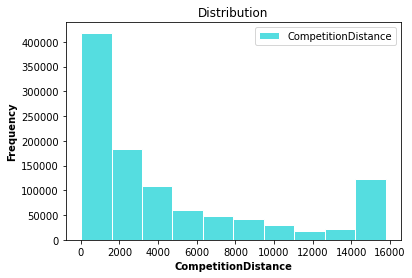

In [16]:
plot_hist(trainset['CompetitionDistance'], 'CompetitionDistance')

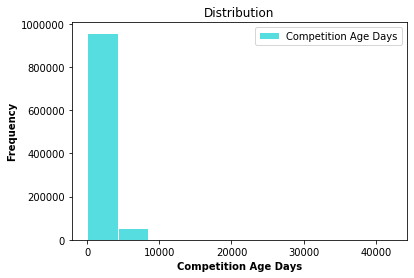

In [15]:
plot_hist(trainset['competition_age_days'], 'Competition Age Days')

In [18]:
trainset['competition_age_days'].describe()

count    1.017209e+06
mean     1.717215e+03
std      1.812286e+03
min      0.000000e+00
25%      8.890000e+02
50%      1.402000e+03
75%      2.234000e+03
max      4.221400e+04
Name: competition_age_days, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a3d992fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3d9a0710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3d992be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3d9a0da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3d9a0e80>],
 'means': []}

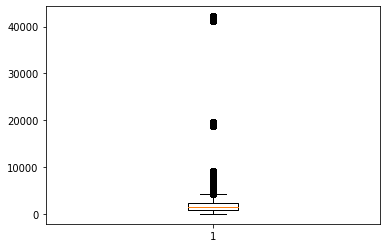

In [25]:
plt.boxplot(trainset['competition_age_days'])

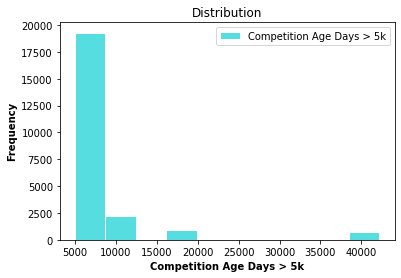

In [28]:
zoom = trainset[trainset['competition_age_days']>5000]
plot_hist(zoom['competition_age_days'], 'Competition Age Days > 5k')

In [89]:
# Interval data are rightly skewed and has some outliers, 
# thus using square-root or log-transformation or scaling with RobustScaler is a good idea

In [17]:
# Recover the original Competition Distance Data
store = pd.read_csv("DA1920_store.csv")
store = store.filter(["Store", "CompetitionDistance"])
#restore original distance with missing values replaced by mean
store["CompetitionDistance"][store["CompetitionDistance"].isna()==True] = store["CompetitionDistance"].fillna(store["CompetitionDistance"]).mean()

/Users/rfdanti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [19]:
#merge dataset
trainset = pd.merge(trainset,store,on='Store', how='inner')


In [20]:
trainset.head()

,Store,StoreType,Assortment,CompetitionDistance_x,Promo2,PromoInterval,Date,Customers,DayOfWeek,Open,...,StateHoliday,competition_age_days,affectedbycompetition,affectedbypromo2,OpeningType,month,year,dateofmonth,CompetitionDistance_y,CompetitionDistance
0,1,2,0,1270,False,0,2014-10-20,560,1,True,...,0,2240,True,False,0,10,2014,20,1270.0,1270.0
1,1,2,0,1270,False,0,2013-07-15,657,1,True,...,0,1778,True,False,0,7,2013,15,1270.0,1270.0
2,1,2,0,1270,False,0,2013-01-21,607,1,True,...,0,1603,True,False,0,1,2013,21,1270.0,1270.0
3,1,2,0,1270,False,0,2015-03-16,605,1,True,...,0,2387,True,False,0,3,2015,16,1270.0,1270.0
4,1,2,0,1270,False,0,2014-05-05,615,1,True,...,0,2072,True,False,0,5,2014,5,1270.0,1270.0


In [21]:
trainset['CompetitionDistance_x'].max()

15770

In [22]:
#remove old version of CompetitionDistance
trainset = trainset.drop(["CompetitionDistance_x", "CompetitionDistance_y"], axis = 1)

In [23]:
trainset.head()

,Store,StoreType,Assortment,Promo2,PromoInterval,Date,Customers,DayOfWeek,Open,Promo,...,SchoolHoliday,StateHoliday,competition_age_days,affectedbycompetition,affectedbypromo2,OpeningType,month,year,dateofmonth,CompetitionDistance
0,1,2,0,False,0,2014-10-20,560,1,True,True,...,True,0,2240,True,False,0,10,2014,20,1270.0
1,1,2,0,False,0,2013-07-15,657,1,True,True,...,True,0,1778,True,False,0,7,2013,15,1270.0
2,1,2,0,False,0,2013-01-21,607,1,True,True,...,False,0,1603,True,False,0,1,2013,21,1270.0
3,1,2,0,False,0,2015-03-16,605,1,True,True,...,False,0,2387,True,False,0,3,2015,16,1270.0
4,1,2,0,False,0,2014-05-05,615,1,True,True,...,False,0,2072,True,False,0,5,2014,5,1270.0


In [38]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
Store                    1017209 non-null int64
StoreType                1017209 non-null category
Assortment               1017209 non-null category
Promo2                   1017209 non-null bool
PromoInterval            1017209 non-null category
DayOfWeek                1017209 non-null category
Date                     1017209 non-null datetime64[ns]
Sales                    1017209 non-null int64
Open                     1017209 non-null bool
Promo                    1017209 non-null bool
StateHoliday             1017209 non-null category
SchoolHoliday            1017209 non-null bool
competition_age_days     1017209 non-null int64
affectedbycompetition    1017209 non-null bool
affectedbypromo2         1017209 non-null bool
month                    1017209 non-null category
NewPromo2Month           1017209 non-null bool
OpeningType              1017209 non-null category


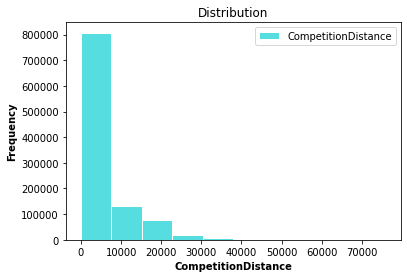

In [24]:
plot_hist(trainset['CompetitionDistance'], 'CompetitionDistance')

In [1]:
plt.boxplot(trainset['CompetitionDistance'])

NameError: name 'plt' is not defined

In [47]:
#before actually implementing transformation i am going to save the csv just in case
trainset.to_csv("train_merged0.5.csv", index=False)

In [95]:
#do the same to testset
testset = pd.read_csv("test_merged0.3.csv")
for column in category_columns:
    testset[column] = testset[column].astype('category')
for column in binary_columns:
    testset[column] = testset[column].astype('bool')
testset = testset.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Customers", 
                              "CompetitionOpenSinceDate", "Promo2SinceYear", "Promo2SinceWeek", 
                              "Promo2SinceDate"], axis = 1)
testset['Date']= pd.to_datetime(testset['Date']) 
testset = pd.merge(testset,store,on='Store', how='inner')
testset["CompetitionDistance"] = testset["CompetitionDistance_y"]
testset = testset.drop(["CompetitionDistance_x", "CompetitionDistance_y"], axis = 1)
testset.head()

,Store,StoreType,Assortment,Promo2,PromoInterval,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,affectedbypromo2,affectedbycompetition,competition_age_days,month,NewPromo2Month,OpeningType,CompetitionDistance
0,1,2,0,False,0,4,2015-09-17,NaN,True,True,0,False,False,True,2572,9,False,0,1270.0
1,1,2,0,False,0,3,2015-09-16,NaN,True,True,0,False,False,True,2571,9,False,0,1270.0
2,1,2,0,False,0,2,2015-09-15,NaN,True,True,0,False,False,True,2570,9,False,0,1270.0
3,1,2,0,False,0,1,2015-09-14,NaN,True,True,0,False,False,True,2569,9,False,0,1270.0
4,1,2,0,False,0,7,2015-09-13,NaN,False,False,0,False,False,True,2568,9,False,0,1270.0


In [96]:
#saving
testset.to_csv("test_merged0.5.csv", index=False)

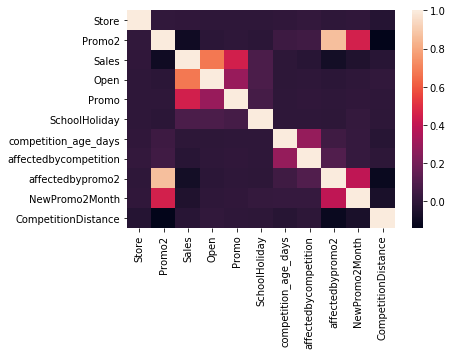

In [50]:
#checking correlation
corr = trainset.corr()
sns.heatmap(corr)

In [51]:
#Sales has high correlation with: 
#1. 'Open' (but it's useless) since if it's = 0 then 'Sales'=0
#2. 'Promo'
trainset[trainset.columns[1:]].corr()['Sales'][:]

Promo2                  -0.091040
Sales                    1.000000
Open                     0.678472
Promo                    0.452345
SchoolHoliday            0.085124
competition_age_days    -0.002709
affectedbycompetition   -0.015717
affectedbypromo2        -0.080329
NewPromo2Month          -0.044955
CompetitionDistance     -0.019207
Name: Sales, dtype: float64

In [ ]:
#cannot calculate correlation for categorical variable
#i'll do it on separate file using LabelEncoder, now back to transformation

In [56]:
trainset['competition_age_days'].skew()

9.401287923104167

In [58]:
trainset['competition_age_days'].describe()

count    1.017209e+06
mean     1.717215e+03
std      1.812286e+03
min      0.000000e+00
25%      8.890000e+02
50%      1.402000e+03
75%      2.234000e+03
max      4.221400e+04
Name: competition_age_days, dtype: float64

In [57]:
trainset['CompetitionDistance'].skew()

2.9323699217340797

In [59]:
trainset['CompetitionDistance'].describe()

count    1.017209e+06
mean     5.430020e+03
std      7.705298e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [25]:
#Competition Age Days
#Log transformation
CompetitionAge_log = np.log(trainset['competition_age_days'])
CompetitionAge_log.describe()

/Users/rfdanti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


count    1.050330e+06
mean             -inf
std               NaN
min              -inf
25%      6.791221e+00
50%      7.254178e+00
75%      7.718685e+00
max      1.065051e+01
Name: competition_age_days, dtype: float64

In [84]:
CompetitionAge_log.skew()

nan

In [26]:
#Since Competition Age has 0 value, try square root
CompetitionAge_sqrt = np.sqrt(trainset['competition_age_days'])
CompetitionAge_sqrt.describe()

count    1.050330e+06
mean     3.706093e+01
std      1.881460e+01
min      0.000000e+00
25%      2.983287e+01
50%      3.760319e+01
75%      4.743416e+01
max      2.054605e+02
Name: competition_age_days, dtype: float64

In [66]:
CompetitionAge_sqrt.skew()

0.4822194716264831

In [76]:
#Box-Cox Transformation
CompetitionAge_bc = stats.boxcox(trainset['competition_age_days'])[0]
pd.Series(CompetitionAge_bc).describe()

ValueError: Data must be positive.

In [83]:
check = trainset[trainset['competition_age_days']==0]
check.describe()

,Store,Sales,competition_age_days,CompetitionDistance
count,84847.000000,84847.000000,84847.0,84847.000000
mean,544.888859,5975.485816,0.0,5491.198157
std,335.043665,3990.211550,0.0,7709.399881
min,5.000000,0.000000,0.0,30.000000
25%,261.000000,3898.500000,0.0,720.000000
50%,550.000000,5980.000000,0.0,2020.000000
75%,859.000000,8123.000000,0.0,7170.000000
max,1111.000000,37646.000000,0.0,58260.000000


In [61]:
#Competition Distance
#Log transformation
CompetitionDistance_log = np.log(trainset['CompetitionDistance'])
CompetitionDistance_log.describe()

count    1.017209e+06
mean     7.644626e+00
std      1.559950e+00
min      2.995732e+00
25%      6.565265e+00
50%      7.753624e+00
75%      8.836374e+00
max      1.123664e+01
Name: CompetitionDistance, dtype: float64

In [62]:
CompetitionDistance_log.skew()

-0.3626368615073435

In [68]:
#Sqrt transformation
CompetitionDistance_sqrt = np.sqrt(trainset['CompetitionDistance'])
CompetitionDistance_sqrt.describe()

count    1.017209e+06
mean     5.997251e+01
std      4.281728e+01
min      4.472136e+00
25%      2.664583e+01
50%      4.827007e+01
75%      8.294577e+01
max      2.754269e+02
Name: CompetitionDistance, dtype: float64

In [69]:
CompetitionDistance_sqrt.skew()

1.1677440721836958

In [27]:
#Box-Cox Transformation
CompetitionDistance_bc = stats.boxcox(trainset['CompetitionDistance'])[0]
pd.Series(CompetitionDistance_bc).describe()

count    1.050330e+06
mean     1.174741e+01
std      3.294522e+00
min      3.493838e+00
25%      9.314063e+00
50%      1.172321e+01
75%      1.421006e+01
max      2.078645e+01
dtype: float64

In [75]:
pd.Series(CompetitionDistance_bc).skew()

-0.03354920005161865

In [28]:
#So far, we can choose Sqrt for 'competition_age_days' and Box-Cox for 'CompetitionDistance'
trainset['CompetitionAge_sqrt'] = np.sqrt(trainset['competition_age_days'])
trainset['CompetitionDistance_bc'] = stats.boxcox(trainset['CompetitionDistance'])[0]
#trainset = trainset.drop(["competition_age_days", "CompetitionDistance"], axis = 1)

In [29]:
#So far, we can choose Sqrt for 'competition_age_days' and Box-Cox for 'CompetitionDistance'
trainset['CompetitionAge_sqrt'] = round(trainset['CompetitionAge_sqrt'],0)
trainset['CompetitionDistance_bc'] = round(trainset['CompetitionDistance_bc'],0)
#trainset = trainset.drop(["competition_age_days", "CompetitionDistance"], axis = 1)

In [30]:
#set categorical type
int_columns = ['CompetitionAge_sqrt', 'CompetitionDistance_bc', 'CompetitionDistance']
     
for column in int_columns:
    trainset[column] = trainset[column].astype('int')

In [31]:
trainset.head()

,Store,StoreType,Assortment,Promo2,PromoInterval,Date,Customers,DayOfWeek,Open,Promo,...,competition_age_days,affectedbycompetition,affectedbypromo2,OpeningType,month,year,dateofmonth,CompetitionDistance,CompetitionAge_sqrt,CompetitionDistance_bc
0,1,2,0,False,0,2014-10-20,560,1,True,True,...,2240,True,False,0,10,2014,20,1270,47,10
1,1,2,0,False,0,2013-07-15,657,1,True,True,...,1778,True,False,0,7,2013,15,1270,42,10
2,1,2,0,False,0,2013-01-21,607,1,True,True,...,1603,True,False,0,1,2013,21,1270,40,10
3,1,2,0,False,0,2015-03-16,605,1,True,True,...,2387,True,False,0,3,2015,16,1270,49,10
4,1,2,0,False,0,2014-05-05,615,1,True,True,...,2072,True,False,0,5,2014,5,1270,46,10


In [32]:
#Saving
trainset.to_csv("train_complete_transformed.csv", index=False)

In [97]:
#Repeat to testset
testset["CompetitionAge_sqrt"] = np.sqrt(testset["competition_age_days"])
testset["CompetitionDistance_bc"] = stats.boxcox(testset["CompetitionDistance"])[0]
testset = testset.drop(["competition_age_days", "CompetitionDistance"], axis = 1)
testset.head()

,Store,StoreType,Assortment,Promo2,PromoInterval,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,affectedbypromo2,affectedbycompetition,month,NewPromo2Month,OpeningType,CompetitionAge_sqrt,CompetitionDistance_bc
0,1,2,0,False,0,4,2015-09-17,NaN,True,True,0,False,False,True,9,False,0,50.714889,11.386008
1,1,2,0,False,0,3,2015-09-16,NaN,True,True,0,False,False,True,9,False,0,50.705029,11.386008
2,1,2,0,False,0,2,2015-09-15,NaN,True,True,0,False,False,True,9,False,0,50.695167,11.386008
3,1,2,0,False,0,1,2015-09-14,NaN,True,True,0,False,False,True,9,False,0,50.685304,11.386008
4,1,2,0,False,0,7,2015-09-13,NaN,False,False,0,False,False,True,9,False,0,50.675438,11.386008


In [100]:
#Saving
testset.to_csv("test_transformed.csv", index=False)